### Student Information
Name: 張哲緯

Student ID: 112033628

GitHub ID:  cheweiiii1109

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
### Begin Assignment Here

In [1]:
# TEST necessary for when working with external scripts
%reload_ext autoreload
%autoreload 2

### ** >>> Exercise 1 : ** 

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
for i in twenty_train.data[:3]:
    print(i)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### ** >>> Exercise 2 : ** 

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X['text'].head(10)

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### ** >>> Exercise 3 : ** 

In [5]:
X.loc[X['category_name']=='sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### ** >>> Exercise 4 : ** 

In [6]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### ** >>> Exercise 5 : ** 

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

is null will return True if this value is null or contain null.
1. Pandas is based on numpy, and the type of np.nan is float in numpy, so A is null.
2. B is empty. The meaning of empty in dictionary is equal to np.nan.
3. For C, D and F, they are values in string type, so they are not null.
4. For E, None means no data type in python, so it is null. 

### ** >>> Exercise 6 : ** 

In [9]:
X_sample = X.sample(n=1000,random_state=42) #random state
print(X['text'])
print("------------------------------------------------------------")
print(X_sample['text'])

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                              ...                        
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 2257, dtype: object
------------------------------------------------------------
561     From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
440     From: jkellett@netcom.com (Joe Kellett) Subjec...
1513    From: noring@netcom.com (Jon Noring) Subject: ...
1360    From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...
259     From: keith@cco.calte

In [10]:
print(X.groupby("category_name").count())
print("------------------------------------------------------------")
print(X_sample.groupby("category_name").count())
print("------------------------------------------------------------")

                        text  category
category_name                         
alt.atheism              480       480
comp.graphics            584       584
sci.med                  594       594
soc.religion.christian   599       599
------------------------------------------------------------
                        text  category
category_name                         
alt.atheism              206       206
comp.graphics            247       247
sci.med                  277       277
soc.religion.christian   270       270
------------------------------------------------------------


In [11]:
print(sum(X.duplicated('text')))
print(sum(X_sample.duplicated('text')))

0
0


1. After sampling, X dataframe remains unchanged, while the X_sample varies with each sampling.
2. Their order has changed
3. No duplicate data in X_sample,which means it won't repeat sampling

### ** >>> Exercise 7 : **

<AxesSubplot:title={'center':'Category distribution'}>

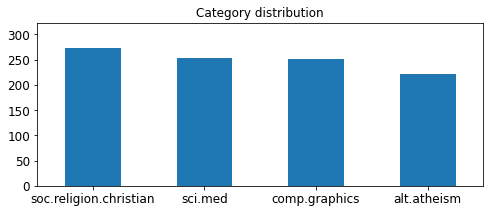

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.category_name.value_counts())+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8 :**

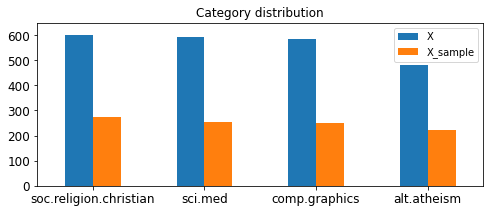

In [13]:
comparision = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
comparision = comparision.set_axis(['X', 'X_sample'], axis='columns')
comparision.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, max(X.category_name.value_counts())+50], 
                 rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### **>>> Exercise 9 (5 min):**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 :**

In [19]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
Matrix = X_counts[4, :50].toarray()
location = np.where(Matrix==1)
print(location)
count_vect.get_feature_names_out()[location[1][1]]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


'01'

### **>>> Exercise 11 :**

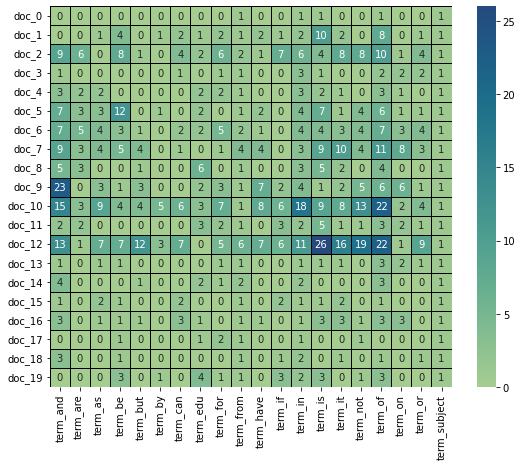

In [20]:
import seaborn as sns

count_vect = CountVectorizer(max_features=30)
X_counts = count_vect.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                center = 15,
                linewidths = 0.5,
                linecolor = 'black',
                cmap="crest",
                annot=True)

### **>>> Exercise 12 :**

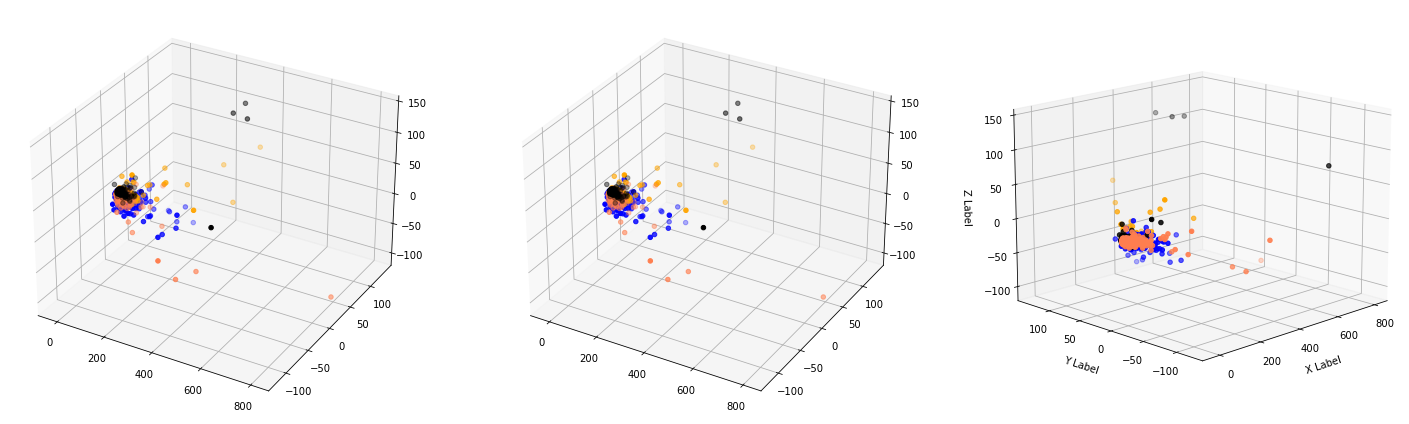

In [21]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
#X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = []
for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        x = X_reduced[X['category_name'] == category].T[0]
        y = X_reduced[X['category_name'] == category].T[1]
        z = X_reduced[X['category_name'] == category].T[2]
        ax[i].scatter(x, y, z, c = c, marker = 'o')
ax[i].grid(color='black', linestyle=':', linewidth=2, alpha=0.2)
ax[i].set_xlabel('\nX Label')
ax[i].set_ylabel('\nY Label')
ax[i].set_zlabel('\nZ Label')
ax[i].view_init(elev=15, azim=45*(2*i+1))

plt.show()        

1. 3D charts can better illustrate relationships between data
2. 3D charts can emphasize data points with specific values

### **>>> Exercise 13 :**

[Text(0, 0, '104'),
 Text(1, 0, '1040'),
 Text(2, 0, '104107'),
 Text(3, 0, '10461'),
 Text(4, 0, '1049'),
 Text(5, 0, '105'),
 Text(6, 0, '105094'),
 Text(7, 0, '10553'),
 Text(8, 0, '105805'),
 Text(9, 0, '10598'),
 Text(10, 0, '106'),
 Text(11, 0, '1060'),
 Text(12, 0, '1065'),
 Text(13, 0, '1066'),
 Text(14, 0, '10665'),
 Text(15, 0, '10669'),
 Text(16, 0, '10679'),
 Text(17, 0, '107'),
 Text(18, 0, '1070'),
 Text(19, 0, '10780'),
 Text(20, 0, '10789'),
 Text(21, 0, '108'),
 Text(22, 0, '1080'),
 Text(23, 0, '10818'),
 Text(24, 0, '10893'),
 Text(25, 0, '109'),
 Text(26, 0, '1095'),
 Text(27, 0, '10983'),
 Text(28, 0, '10984'),
 Text(29, 0, '10fps'),
 Text(30, 0, '10h'),
 Text(31, 0, '10k'),
 Text(32, 0, '10mg'),
 Text(33, 0, '10mhz'),
 Text(34, 0, '10th'),
 Text(35, 0, '10yo'),
 Text(36, 0, '11'),
 Text(37, 0, '110'),
 Text(38, 0, '1100'),
 Text(39, 0, '11004'),
 Text(40, 0, '110mbytes'),
 Text(41, 0, '111'),
 Text(42, 0, '1111'),
 Text(43, 0, '1113'),
 Text(44, 0, '111651'),
 Tex

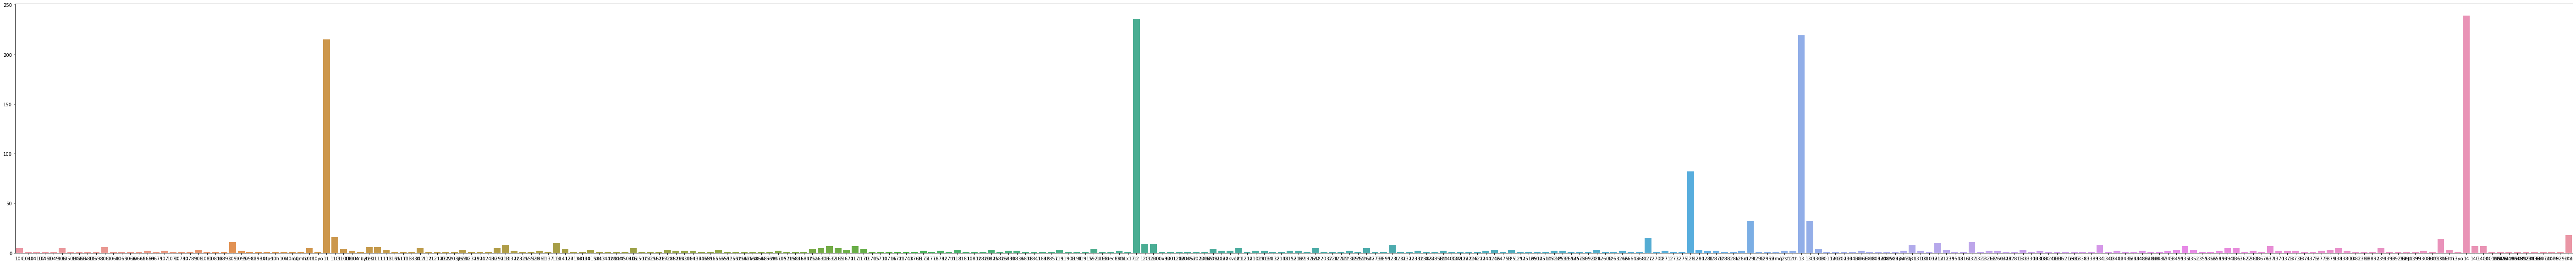

In [22]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]  
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[300:600], 
            y=term_frequencies[300:600])
g.set_xticklabels(count_vect.get_feature_names_out()[300:600])

### **>>> Exercise 14 :**

In [23]:
import plotly.express as px

count_vect = CountVectorizer(max_features=30)   # select the 30 most common words in the data
X_counts = count_vect.fit_transform(X.text)
frequencies = []
for i in range(0,X_counts.shape[1]):
    frequencies.append(sum(X_counts[:,i].toarray()))
frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = px.bar(frequencies[0:300], x=count_vect.get_feature_names_out()[0:300] ,  
             y=frequencies[0:300])
fig.show()

### **>>> Exercise 15 :**

In [24]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis = 0))[0]
sort_index = np.argsort(-term_frequencies)
sorted_freq = term_frequencies[sort_index]
fig = px.bar(sorted_freq[0:300], x=count_vect.get_feature_names_out()[sort_index[0:300]] ,  
             y=sorted_freq[0:300])
fig.show()

### **>>> Exercise 16 :**

Q : Try to generate the binarization using the `category_name` column instead. Does it work?
A : YES

In [25]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
